<h1><center>CMPE 462 - Project 1<br>Binary Classification with Logistic Regression<br>

# BetaZero

1. Baran Deniz Korkmaz - 2015400183
2. Doğukan Kalkan - 2015400132

# Imported Packages
This section introduces the imported packages, as they are the initial requirements for the implementation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from mpl_toolkits.mplot3d import Axes3D
import math
import datetime

# Auxiliary Resources
This section contains the auxiliary functions that we utilize for the implementation.

# 1. Data Handling Resources
This section introduces the auxiliary functions that we use to carry out data manipulations.

## a.form_input_data(FEATURES)
Description: Converts the list of data into more easy-to-use 2-D array.

Parameters:
1. FEATURES: Represents training data or test data  

Implementation Details: The function takes a list of data that contains intensity and symmetry features and turns it into 2-D array whose first column is filled with 1s and the other two columns are filled with intensity and symmetry values.

Return Values: 
1. result: A 2-D array.

In [2]:
def form_input_data(FEATURES):
    result = np.array(FEATURES).T
    result = np.insert(result, 0, 1, axis=1)
    return result

## b.combine_data(X,Y):
Description: Combines the two arrays.

Parameters: 
1. X: Training Data or Test Data
2. Y: Training Labels or Test Labels

Implementation Details: Merges the data and labels into one array where the last column is the matrix Y.

Return Values:
1. The merged array.

In [3]:
def combine_data(X,Y):
    Y = np.array(Y).reshape(len(Y),1)
    return np.hstack((X,Y))

## c.split_data(DATA):
Description: Splits the given array into 2 arrays which represent data and labels.

Parameters: 
1. DATA: Contains data and labels. 

Implementation Details: Takes the previously merged array by the function 'combine_data' and splits it into two arrays, where one of them contains the data and the other one contains the labels.

Return Values:
1. Training Data or Test Data
2. Training Labels or Test Labels.

In [4]:
def split_data(DATA):
    X,Y=[],[]
    for elem in DATA:
       X.append(elem[:-1])
       Y.append(elem[-1])
    return np.array(X).reshape(len(DATA),DATA.shape[1]-1),np.array(Y).reshape(len(DATA),1)

## d.s_fold_division(s,DATA):
Description: Takes an array and converts it into array of arrays.

Parameters: 
1. s: The number of divisions
2. DATA: The array to be divided

Implementation Details: Takes the array 'DATA', converts it into array of 's' arrays.

Return Values:
1. Array of 's' arrays.

In [5]:
def s_fold_division(s,DATA):
    return np.array_split(DATA,s)

## e.get_max_index(LIST):
Description: Finds the index of the maximum element in the list

Parameters:
1. LIST: 

Implementation Details: Iterates over the list, stores the maximum element and its index.

Return Values:
1. The index of the maximum element in the list.

In [6]:
def get_max_index(LIST):
    max_value = LIST[0]
    max_index = 0
    for i in range(1,len(LIST)):
        if LIST[i]>max_value:
            max_index = i
            max_value = LIST[i]
    return max_index

## f.scatter_plot_helper(LABELS,FEATURES):
Description: Separates the positive and negative classes 

Parameters: 
1. LABELS: Labels of the Data
2. FEATURES: Training Data or Test Data

Implementation Details: Initially, two arrays for positive and negative class are created and they both contain two empty arrays. Then, for each label, all corresponding features are inserted into the array, POSITIVE_CLASS if the label is positive and into the array, NEGATIVE_CLASS, otherwise.

Return Values:
1. POSITIVE_CLASS: An array that contains values of features that belong to positive class in separate arrays.
2. NEGATIVE_CLASS: An array that contains values of features that belong to negative class in separate arrays.

In [7]:
def scatter_plot_helper(LABELS,FEATURES):
    POSITIVE_CLASS = []
    NEGATIVE_CLASS = []
    for i in range(len(FEATURES)):
        POSITIVE_CLASS.append([])
        NEGATIVE_CLASS.append([])
    for i in range(len(LABELS)):
        if LABELS[i] == 1:
            for j in range(len(POSITIVE_CLASS)):
                POSITIVE_CLASS[j].append(FEATURES[j][i])
        else:
            for j in range(len(NEGATIVE_CLASS)):
                NEGATIVE_CLASS[j].append(FEATURES[j][i])
    return POSITIVE_CLASS,NEGATIVE_CLASS

# 2. Feature Extraction Resources
This section introduces the auxiliary functions that we use for feature extraction.

## a. darkness_distribution_analysis(MATRIX)
Description: Extracts the darkness feature for the given 2D-Matrix.

Parameters:
1. MATRIX: 2D-Matrix of Arrays

Implementation Details: This feature aims at analyzing the distribution of dark pixels. For a given threshold value of -0.75, for each row we analyze the consecutive dark pixel sequences. The standard devation of the differences between the length of the first and last consecutive dark sequences is returned.  

Return Values:
1. Darkness Value

In [8]:
THRESHOLD_DARKNESS = -0.7

def darkness_distribution_analysis(MATRIX):
    result = []
    for row in MATRIX:
        consecutive = 0
        current_consecutive = []
        for element in row:
            if element < THRESHOLD_DARKNESS:
                consecutive += 1
            else:
                current_consecutive.append(consecutive)
                consecutive = 0
        if len(current_consecutive) == 0:
            continue
        first_darkness_size = current_consecutive[0]
        last_darkness_size = current_consecutive[-1]
        result.append(abs(last_darkness_size-first_darkness_size))
    return np.std(result)

## b. brightness_distribution_analysis(MATRIX)
Description: Extracts the brightness feature for the given 2D-Matrix.

Parameters:
1. MATRIX: 2D-Matrix of Arrays

Implementation Details: This feature aims at analyzing the distribution of bright pixels. For a given threshold value of 0.8, for each row we analyze the mean of indices of bright pixels. The standard devation of the mean values is returned.  

Return Values:
1. Brightness Value

In [9]:
THRESHOLD_BRIGHTNESS = 0.8

def brightness_distribution_analysis(MATRIX):
    result = []
    for row in MATRIX:
        current_row = []
        for i in range(len(row)):
            if row[i]>=THRESHOLD_BRIGHTNESS:
                current_row.append(i)
        if len(current_row) == 0:
            continue
        else:
            result.append(np.average(current_row))
    return np.std(result)

# 3. Plotting Resources
This section introduces the auxiliary functions that we use to plot graphs and charts.

## a.autolabel(rects,ax):
Description: 

Parameters:
1. rects: Bars.
2. ax: A plot.

Implementation Details: Puts the y value on top of each bar.

In [10]:
# REFERENCE: https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
def autolabel(rects,ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

## b.show_images(DIGIT1,DIGIT2):
Description: Displays two instances of digits.

Parameters:
1. DIGIT1: The Digit 1
2. DIGIT2: The Digit 5

Implementation Details: Takes two 16x16 arrays, and displays the corresponding digits.

In [11]:
def show_images(DIGIT1,DIGIT2):
    plt.figure(figsize=(8, 4))
    plt.subplot(121)
    plt.imshow(DIGIT1)
    plt.title("Image: Digit 1")
    plt.subplot(122)
    plt.imshow(DIGIT2)
    plt.title("Image: Digit 5")
    plt.show()

## c.error_vs_time_visualization(TUNED_PARAMETER_LIST,ERRORS,ITERATION_COUNTS,TITLE,TUNED_PARAMETER):
Description: Displays the error vs time plot.

Parameters:
1. TUNED_PARAMETER_LIST: A list of learning rates or lambda values.
2. ERRORS: Array of arrays, where each array keeps the errors encountered during the logistic regression.
3. ITERATION_COUNTS: An array that keeps number of steps of each logistic regression performed with the corresponding learning rate.
4. TITLE: A string to specifiy the representation.
5. TUNED_PARAMETER: A string to indicate the type of TUNED_PARAMETER.

Implementation Details: Displays a subplot for each tuned parameter, error value and number of iterations where the x-axis represents the number of iterations and the y-axis represents the error values. For each subplot, the corresponding tuned parameter is also shown.

In [12]:
def error_vs_time_visualization(TUNED_PARAMETER_LIST,ERRORS,ITERATION_COUNTS,TITLE,TUNED_PARAMETER):
    ITERATION_COUNTS = [[x for x in range(1, it + 1)] for it in ITERATION_COUNTS]
    col = 1
    fig = plt.figure(1)
    plt.suptitle('Error v Iterations for '+str(TITLE))
    for (tuned_parameter, error, iteration) in zip(TUNED_PARAMETER_LIST, ERRORS, ITERATION_COUNTS):
        ax = fig.add_subplot(len(TUNED_PARAMETER_LIST), 1, col)
        ax.plot(iteration, error)
        ax.set_xlabel("Iteration")
        ax.set_ylabel("Error")
        ax.set_title(TUNED_PARAMETER+": " + str(tuned_parameter),fontsize=8)
        col = col + 1
    plt.show()

## d.error_vs_w_3d_visualization(ERRORS,WEIGHTS,TUNED_PARAMETER_LIST,TITLE,TUNED_PARAMETER):
Description: Displays the error vs weights plot.

Parameters:
1. TUNED_PARAMETER_LIST: A list of learning rates or lambda values.
2. ERRORS: Array of arrays, where each array keeps the errors encountered during the logistic regression.
3. WEIGHTS: Optimal weights for each learning rate.
4. TITLE: The title for the plot.
5. TUNED_PARAMETER: A string to indicate the type of TUNED_PARAMETER.

Implementation Details: Displays a subplot for each tuned parameter, error value and weights where the x-axis represents the first component of weights, the y-axis represents the second component of weights and the z-axis represents the error values. For each subplot, the corresponding tuned parameter is also shown.

In [13]:
def error_vs_w_3d_visualization(ERRORS,WEIGHTS,TUNED_PARAMETER_LIST,TITLE,TUNED_PARAMETER):
    row = 1
    for (tuned_parameter, errors, weights) in zip(TUNED_PARAMETER_LIST, ERRORS, WEIGHTS):
        X=[weight[0][1] for weight in weights]
        Y=[weight[0][2] for weight in weights]
        X=np.array(X)
        Y=np.array(Y)
        Z=np.array(errors)
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        ax.plot(X, Y, Z, label='E(w) v w')
        ax.set_xlabel("W1")
        ax.set_ylabel("W2")
        ax.set_zlabel("Error")
        ax.set_title("Error vs Weights for " + str(TITLE) +"\n"+TUNED_PARAMETER +" : " + str(tuned_parameter))
        ax.legend(loc='lower left')
        row = row + 1
    plt.show()

## accuracy_plots(TRAINING_ACCURACY,TEST_ACCURACY,TUNED_PARAMETER_LIST,TITLE,TUNED_PARAMETER):
Description: Displays a bar charts that represents the trainig accuracy and test accuracy for corresponding learning rates.

Parameters:
1. TRAINING_ACCURACY: Array of training accuracies obtained through logistic regression.
2. TEST_ACCURACY: Array of test accuracies  obtained through logistic regression.
3. TUNED_PARAMETER_LIST: A list of learning rates or lambda values.
4. TITLE: The title for the plot.
5. TUNED_PARAMETER: A string to indicate the type of TUNED_PARAMETER.

Implementation Details: Displays a bar chart where training accuracy and test accuracy for each learning rate are shown. For convenience, only 3 digits are shown after the decimal point.

In [14]:
def accuracy_plots(TRAINING_ACCURACY,TEST_ACCURACY,TUNED_PARAMETER_LIST,TITLE,TUNED_PARAMETER):
    #Rounding
    TRAINING_ACCURACY_ROUNDED = [ round(100*elem, 3) for elem in TRAINING_ACCURACY ]
    TEST_ACCURACY_ROUNDED = [ round(100*elem, 3) for elem in TEST_ACCURACY ]
    #Rounding
    x = np.arange(len(TUNED_PARAMETER_LIST))  # the label locations
    width = 0.2  # the width of the bars
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width / 2, TRAINING_ACCURACY_ROUNDED, width, label='Training')
    rects2 = ax.bar(x + width / 2, TEST_ACCURACY_ROUNDED, width, label='Test')
    ax.set_ylabel('Accuracy')
    ax.set_title('Accuracy per ' + TUNED_PARAMETER + ' for ' + TITLE)
    ax.set_xticks(x)
    ax.set_xticklabels(TUNED_PARAMETER_LIST)
    ax.legend()
    autolabel(rects1, ax)
    autolabel(rects2, ax)
    fig.tight_layout()
    plt.show()

## f.cross_validation_plots(current_accuracy, current_stdev, current_lambda_range, iteration_count, representation):
Description: Displays a bar chaa barrts that represents the trainig accuracy and test accuracy for corresponding learning rates.

Parameters:
1. current_accuracy: Array of accuracies
2. current_stdev: Array of standard deviations
3. current_lambda_range: Array of lambda values.
4. iteration_count: An integer to specify the iteration number. 
5. representation: A string to specify the title of the plot.
6. mode: A boolean to specify the type of call.

Implementation Details: Displays a bar chart and a table where accuracy and standard deviation for each lambda value are shown. For convenience, only 3 digits are shown after the decimal point.

In [15]:
def cross_validation_plots(current_accuracy, current_stdev, current_lambda_range, iteration_count, representation, mode):
    #Rounding
    current_accuracy_rounded = [round(100*elem, 3) for elem in current_accuracy]
    current_stdev_rounded = [round(100*elem, 3) for elem in current_stdev]
    current_lambda_range_rounded = [round(elem, 6) for elem in current_lambda_range] #discuss this
    #Rounding
    x = np.arange(len(current_lambda_range))
    width = 0.2
    fig, ax = plt.subplots(2)
    if mode:
        plt.suptitle("Bar Chart and Table for Cross Validation for " + representation + " - Iteration " + str(iteration_count))
    else:
        plt.suptitle("Bar Chart and Table for Cross Validation for " + representation)
    rects1 = ax[0].bar(x - width / 2, current_accuracy_rounded, width, label='Accuracy')
    rects2 = ax[0].bar(x + width / 2, current_stdev_rounded, width, label='Std Dev')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xticks(x)
    ax[0].set_xticklabels(current_lambda_range_rounded)
    ax[0].legend()
    autolabel(rects1, ax[0])
    autolabel(rects2, ax[0])

    clust_data = []
    clust_data.append(current_lambda_range_rounded)
    clust_data.append(current_accuracy_rounded)
    clust_data.append(current_stdev_rounded)
    # collabel = current_lambda_range
    rowlabel = ("Lambda", "Accuracy", "Std Dev")
    ax[1].axis('tight')
    ax[1].axis('off')
    the_table = ax[1].table(cellText=clust_data, rowLabels=rowlabel, cellLoc='center', loc='center')
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(10)
    fig.tight_layout()
    plt.show()

# 4. General Logistic Regression Resources
This section introduces the auxiliary functions that we use for logistic regression.

## a. sigmoid(s)
Description: Returns the value of sigmoid function by given parameter.

Parameters:
1. s: Sigmoid parameter.

In [16]:
def sigmoid(s):
    return 1 / (1 + np.exp(-s))

## b. error(X,Y,W,N,Lambda)
Description: Returns the loss value based on model weights and lambda at a time.

Parameters:
1. X: Input Data (Training/Test Data)
2. Y: Output Data (Binary Label Data)
3. W: Current Model Weights
4. N: Number of Samples (Length of Y)
5. Lambda: Regularization Coefficient

Implementation Details: Implements the logistic loss calculation for a given model parameters at a time. Please see the report for detailed explanation about in-sample error calculations for logistic regression.

Return Values:
1. result: Current Loss Value

In [17]:
def error(X,Y,W,N,Lambda):
    result = 0.0
    for (x1,y1) in zip(X,Y):
        exp = np.exp(-1*y1*(W.dot(x1.reshape(X.shape[1],1))))
        result = result + math.log((1+exp),math.e)
    result = result / N
    if not(Lambda == None):
        result += Lambda/2 * pow(LA.norm(W),2)
    return result

## c. gradient(X,Y,W,N,Lambda)
Description: Returns the gradient vector based on model weights and lambda at a time.

Parameters:
1. X: Input Data (Training/Test Data)
2. Y: Output Data (Binary Label Data)
3. W: Current Model Weights
4. N: Number of Samples (Length of Y)
5. Lambda: Regularization Coefficient

Implementation Details: Implements the gradient computation for a given model parameters and lambda at a time. Please see the report for detailed explanation about gradient computation for logistic regression.

Return Values:
1. result: Current Gradient Vector.

In [18]:
def gradient(X,Y,W,N,Lambda):
    result = np.zeros(X.shape[1]).reshape(1,X.shape[1])
    for (x1,y1) in zip(X,Y):
        result = result + -1*y1*(x1.reshape(1,X.shape[1]))*sigmoid(-1*y1*W.dot(x1.reshape(X.shape[1],1)))
    result = np.divide(result,N)
    if not(Lambda == None):
        result += np.multiply(W,Lambda)
    return result

## d. logistic_regression(X,Y,W,N,LEARNING_RATE,LAMBDA)
Description: Implements logistic regression learning algorithm.

Parameters:
1. X: Input Data (Training/Test Data Constructed by Feature Extraction)
2. Y: Output Data (Binary Label Data)
3. W: Initial Model Weights (Randomly Initialized by Normal Dist.)
4. N: Number of Samples (Length of Y)
5. LEARNING_RATE: Current Learning Rate
6. Lambda: Regularization Coefficient

Implementation Details: Implements the learning algorithm for logistic regression. Please see the report for detailed explanation about learning algorithm for logistic regression.

Return Values:
1. W: Final Weights (Obtained within the Final Iteration)
2. ERRORS: List of loss values per iteration.
3. WEIGHTS: List of vectors of weights per iteration.

In [19]:
def logistic_regression(X,Y,W,N,LEARNING_RATE,LAMBDA):
    ERRORS = []
    WEIGHTS = []
    epsilon = pow(10, -4)
    error_next = error(X, Y, W, N, LAMBDA)
    while True:
        gradient_w = gradient(X, Y, W, N, LAMBDA)
        W_next = W - LEARNING_RATE * gradient_w
        error_current = error_next
        ERRORS.append(error_current)
        WEIGHTS.append(W)
        error_next = error(X, Y, W_next, N, LAMBDA)
        if epsilon > abs(error_next - error_current):
            break
        W = W_next
    return W, ERRORS, WEIGHTS

## e. logistic_regression_manager(X,Y,LEARNING_RATES,LAMBDA)
Description: Handles subsequent logistic regression calls for different learning rates and returns required information for reporting overall results.

Parameters:
1. X: Input Data (Training/Test Data Constructed by Feature Extraction)
2. Y: Output Data (Binary Label Data)
3. LEARNING_RATES: List of Learning Rates
4. Lambda: Regularization Coefficient

Implementation Details: For each learning rate, makes a logistic regression call. Collects the vectors of error and weights over the iterations in a list. Then returns the collected information.

Return Values:
1. W_OPTIMAL: The optimal vector of weights for the last learning rate only.
2. WEIGHTS_LIST: List of lists whereby each list contains the model weights over iterations for a given learning rate.
3. ERRORS: List of lists whereby each list contains loss values over iterations for a given learning rate.
4. ITERATION_COUNTS: List of iteration counts for the predetermined learning rates respectively.

In [20]:
def logistic_regression_manager(X,Y,LEARNING_RATES,LAMBDA):
    ERRORS = []
    WEIGHTS_LIST = []
    W_OPTIMAL = []
    for learning_rate in LEARNING_RATES:
        W = np.random.randn(1, X.shape[1])
        W_OPTIMAL, CURRENT_LOSS, WEIGHTS = logistic_regression(X=X, Y=Y, W=W, N=len(Y), LEARNING_RATE=learning_rate, LAMBDA=LAMBDA)
        ERRORS.append(CURRENT_LOSS)
        WEIGHTS_LIST.append(WEIGHTS)
    MINIMUM_ERRORS = [element[-1] for element in ERRORS]
    ITERATION_COUNTS = [len(ERRORS[i]) for i in range(len(LEARNING_RATES))]
    return W_OPTIMAL,WEIGHTS_LIST,ERRORS,ITERATION_COUNTS

## f. regularization_manager(X,Y,LEARNING_RATE,LAMBDA_LIST)
Description: Handles subsequent logistic regression calls for different lambda values and a fixed learning rate,then returns required information for reporting overall results.

Parameters:
1. X: Input Data (Training/Test Data Constructed by Feature Extraction)
2. Y: Output Data (Binary Label Data)
3. LEARNING_RATE: Current Learning Rate
4. LAMBDA_LIST: List of Regularization Coefficients

Implementation Details: For each lambda coefficient, makes a logistic regression call by a fixed learning rate. Collects the vectors of error and weights over the iterations in a list. Then returns the collected information. The regularization manager works quiet in a similar way that logistic_regression_manager works. Only the changing parameter differs. While logistic_regression_manager makes subsequent calls of logistic regression for changing learning rates, regularization_manager makes for changing regularization coefficients.

Return Values:
1. W_OPTIMAL: The optimal vector of weights for the last lambda coefficient only.
2. WEIGHTS_LIST: List of lists whereby each list contains the model weights over iterations for a given lambda coefficient.
3. ERRORS: List of lists whereby each list contains loss values over iterations for a given lambda coefficient.
4. ITERATION_COUNTS: List of iteration counts for the predetermined lambda coefficients respectively.

In [21]:
def regularization_manager(X,Y,LEARNING_RATE,LAMBDA_LIST):
    ERRORS = []
    WEIGHTS_LIST = []
    W_OPTIMAL = []
    for regularization_coeff in LAMBDA_LIST:
        W = np.random.randn(1, X.shape[1])
        W_OPTIMAL, CURRENT_LOSS, WEIGHTS = logistic_regression(X=X, Y=Y, W=W, N=len(Y), LEARNING_RATE=LEARNING_RATE, LAMBDA=regularization_coeff)
        ERRORS.append(CURRENT_LOSS)
        WEIGHTS_LIST.append(WEIGHTS)
    MINIMUM_ERRORS = [element[-1] for element in ERRORS]
    ITERATION_COUNTS = [len(ERRORS[i]) for i in range(len(LAMBDA_LIST))]
    return W_OPTIMAL,WEIGHTS_LIST,ERRORS,ITERATION_COUNTS

## g. predict(X,W)
Description: Predicts class labels for a given data constructed by features and trained model weights.

Parameters:
1. X: Input Data (Training/Test Data Constructed by Feature Extraction)
2. W: Trained Model Weights

Implementation Details: Makes predictions based on sigmoid function. The return vector contains probability values for each data sample. The probability larger than 0.5 implies a positive class instance (digit 1), otherwise it implies a negative class (digit 5).

Return Values:
1. Prediction Vector

In [22]:
def predict(X,W):
    RESULT = []
    for s in W.dot(np.transpose(X)):
        RESULT.append(sigmoid(s))
    return np.array(RESULT).reshape(1,len(X))

## h. accuracy_score(Y_Target,Y_Predicted)
Description: Returns the percentage of correctly estimated samples.

Parameters:
1. Y_Target: Target Output Data (Training/Test Data Constructed by Feature Extraction)
2. Y_Predicted: Probability Vector for Each Sample

Implementation Details: The probability larger than 0.5 implies a positive class instance (digit 1), otherwise it implies a negative class (digit 5). Based on the characteristics of sigmoid function, returns the percentage of correctly estimated samples.

Return Values:
1. Accuracy(%)

In [23]:
def accuracy_score(Y_Target,Y_Predicted):
    correct = 0.0
    for (y_pred,y_targ) in zip(Y_Predicted[0],Y_Target):
        estimation = 1 if y_pred>0.5 else -1
        if estimation == y_targ:
            correct += 1.0
    return (correct/len(Y_Target))

## i. get_optimal_weights(X_TRAINING,X_TEST,Y_TRAINING,Y_TEST,WEIGHTS_LIST,TUNED_PARAMETER_LIST,TITLE,TUNED_PARAMETER)
Description: Compares the instances of subsequently trained models by a given subset of tuned parameters (i.e. learning rate or lambda). Generates an overall report, and returns the best model weights obtained and the parameter that it provides the best accuracy.

Parameters:
1. X_TRAINING: Training Data (Constructed by Feature Extraction)
2. X_TEST: Test Data (Constructed by Feature Extraction)
3. Y_TRAINING: Labels of Training Data
4. Y_TEST: Labels of Test Data
5. WEIGHTS_LIST: List of lists whereby each list contains the model weights over iterations for a given learning rate.
6. TUNED_PARAMETER_LIST: List of Tuned Parameters (Learning Rates of Lambda Coefficients)
7. TITLE: Title for Plotting
8. TUNED_PARAMETER: Explicit Name of Tuned Parameter for Titles related to Plotting

Implementation Details: For each tuned parameter value (learning rate or lambda), based on the optimal model weights that are obtained by the final iterations for each tuned parameter, evaluates the accuracy for training & test data. Generates the overall report by plotting. Then returns the optimal model weights that gives the best test accuracy, and the corresponding tuned parameter value.

Return Values:
1. Optimal Model Weights
2. Learning Rate/Lambda

In [24]:
def get_optimal_weights(X_TRAINING,X_TEST,Y_TRAINING,Y_TEST,WEIGHTS_LIST,TUNED_PARAMETER_LIST,TITLE,TUNED_PARAMETER):
    TRAINING_ACCURACY = []
    TEST_ACCURACY = []
    for weights in WEIGHTS_LIST:
        final_weight = weights[-1]
        y_predicted_training = predict(X_TRAINING,final_weight)
        y_predicted_test = predict(X_TEST,final_weight)
        training_accuracy = accuracy_score(Y_TRAINING,y_predicted_training)
        test_accuracy = accuracy_score(Y_TEST,y_predicted_test)
        TRAINING_ACCURACY.append(training_accuracy)
        TEST_ACCURACY.append(test_accuracy)
    #Plotting
    accuracy_plots(TRAINING_ACCURACY,TEST_ACCURACY,TUNED_PARAMETER_LIST,TITLE,TUNED_PARAMETER)
    max_index = get_max_index(TEST_ACCURACY)
    return WEIGHTS_LIST[max_index][-1],TUNED_PARAMETER_LIST[max_index]

## j. def cross_validation(X,Y,LAMBDA,s):
Description: Performs an s-fold cross validation.

Parameters:
1. X: Traning Data
2. Y: Labels of Training Data.
3. LAMBDA: A list of lambda values.
4. s: Number of divisons of the data.

Implementation Detals: The function takes Training Data and its Labels as its parameters. The first step is to combine them into one array so that a shuffle can be performed on it before proceeding further. After the shuffling, the data is divided into 's' different pieces each of which is to be a test data in corresponding iteration.

Afterwards, for each lambda value in LAMBDA, a cross validation procedure is performed. For each lambda value, one of the pieces obtained beforehand is used for validation and the rest is used to train the model. In each of these iterations, the optimal weight is found and used to find the accuracy of the model.

For each lambda value, the corresponding average accuracy and standard deviations are stored.



Return Values:

1. accuracy_result: A list of accuracies each of which corresponds to a lambda value in the list LAMBDA.
2. stdev_result: A list of standard deviations each of which corresponds to a lambda value in the list LAMBDA.

In [25]:
def cross_validation(X,Y,LAMBDA,s):
    data_set = combine_data(X,Y)
    np.random.shuffle(data_set)
    X,Y = split_data(data_set)
    pieces_x = s_fold_division(s,X)
    pieces_y = s_fold_division(s,Y)
    X_I_TRAINING_LIST = []
    Y_I_TRAINING_LIST = []
    for i in range(s):
        x_i_training = []
        y_i_training = []
        for j in range(s):
            if j==i:
                continue
            x_i_training += list(pieces_x[j])
            y_i_training += list(pieces_y[j])
        X_I_TRAINING_LIST.append(np.array(x_i_training))
        Y_I_TRAINING_LIST.append(np.array(y_i_training))
    accuracy_result = []
    stdev_result = []
    w_init = np.random.randn(1,X.shape[1])
    LEARNING_RATE = [0.05]
    for lmbda in LAMBDA:
        current_accuracy = []
        for i in range(s):
            x_i_training = X_I_TRAINING_LIST[i]
            y_i_training = Y_I_TRAINING_LIST[i]
            x_i_test = np.array(pieces_x[i])
            y_i_test = np.array(pieces_y[i])
            w_optimal,_,_ = logistic_regression(x_i_training,y_i_training,w_init,len(y_i_training),LEARNING_RATE,lmbda)
            y_i_predict = predict(x_i_test,w_optimal)
            accuracy_i = accuracy_score(y_i_test,y_i_predict)
            current_accuracy.append(accuracy_i)
        accuracy_result.append(np.average(current_accuracy))
        stdev_result.append(np.std(current_accuracy))
    return accuracy_result,stdev_result

## k. def cross_validation_manager(X,Y,LAMBDA,s,mode, representation):
Description: A manager function that calls the actual cross validation function.

Parameters:
1. X: Traning Data
2. Y: Labels of Training Data.
4. s: Number of divisons of the data.
4. lambda_list: A list of lambda values.
5. mode: A boolean to specificy the type of call.
6. representation: A string to specify the title of the plot.

Implementation Details: This function is an orchestrator that is utilized to perform cross validation procedure in a more efficient way. The function can be called in two modes: autonomous and manual. To be more specific, one can call the function with a list of lambda values to his/her desire to know the optimal lambda value in that list. In this case, there is only one iteration. To do this, the parameter 'mode' should be set fo False.

If the call is done with the parameter mode set to True, then the function is called to find a lambda value that is as close as possible to the optimal lambda value. In each iteration, a list of lambda values is created depending on the lower and upper limits of the range. 

Initially, the lower limit and upper limit are set to 0 and 1, respectively. Then, the list is filled with 5 lambda values within this range. Then the actual cross validation procedure is performed with this list. Then the returned optimal lambda value for that list is the new optimal lambda value and the corresponding accuracy and  standard deviation are the new accuracy and standard deviation.

After that, the upper limit and lower limit are updated according to the lambda value obtained in the last iteration. We call that lambda value mean_limit. Also we have a variable used in the process of updating the limits of our new range, which is delta and obtained as follows:

\begin{align}
                delta = (upper\_limit - lower\_limit)/10
\end{align}

This procedure is repeated until there is not enough improvement or no improvement at all.

Return Values:
1. optimal_lambda: The optimal lambda value for the model.

In [26]:
def cross_validation_manager(X, Y, s, lambda_list, mode, representation):
    iteration_count = 0
    optimal_accuracy = 0.0
    optimal_lambda = 0.0
    lower_limit = 0.0
    upper_limit = 1.0

    while True:
        iteration_count += 1
        current_lambda_range = [(i) * (upper_limit-lower_limit) * 0.2 + lower_limit for i in range(s)] if mode else lambda_list
        current_accuracy_result, current_stdev_result = cross_validation(X, Y, current_lambda_range, s)
        current_accuracy = max(current_accuracy_result)
        current_accuracy_index = current_accuracy_result.index(current_accuracy)
        mean_limit = current_lambda_range[current_accuracy_index]
        accuracy_difference = current_accuracy - optimal_accuracy
        if optimal_accuracy >= current_accuracy or accuracy_difference < math.pow(10, -5) or (not mode):
            cross_validation_plots(current_accuracy_result, current_stdev_result, current_lambda_range, iteration_count, representation, mode)
            break
        else:
            cross_validation_plots(current_accuracy_result, current_stdev_result, current_lambda_range, iteration_count, representation, mode)
            optimal_accuracy = current_accuracy
            optimal_lambda = mean_limit
            delta = (upper_limit - lower_limit)/10
            upper_limit = mean_limit + delta
            lower_limit = mean_limit - delta if (mean_limit - 0.2 > 0.0) else 0.0
            continue
    return optimal_lambda

# Introduction

In the project, we are asked to build a comprehensive machine learning application which uses the fundamentals of logistic regression. You will be able to see the implementations step by step with brief explanations in the notebook. Notice that there exists references from the report when considered necessary by the group members in order to guide the reader effectively.

The project consists of 3 parts as listed below:
1. Feature Extraction
2. Logistic Regression
3. Evaluation

The auxiliary functions that form the core of implementations for the subsections are stated above explicitly in detail. Before moving further, please make sure you have analyzed carefully the auxiliary functions. To do so, we obtain not only modular and reusable implementation which form the fundamentals of a coding environment, but also provide a well-organized coding structure that provides reader an inductive observation.

## Task 1: Feature Extraction

One would probably say that computers can think in terms of data. One can say that machine learning applications owe their power into the wisdom of data as well. Essentiality of a well-organized data is an absolute parameter for any machine learning problem. Thanks to MNIST data set, we can easily gather training and test data of size 1561x256 and 424x256 where each row consists of flattened 16x16 matrices of pixel values. We begin our work by loading our data by `np.load`, then converting it into desired form where flattened pixel values are again reshaped into 2D-matrices of size 16x16.

In [27]:
MATRIX_SIZE=16

TRAINING_DATA = np.load('train_data.npy')
TRAINING_DATA = [np.reshape(element, (MATRIX_SIZE,MATRIX_SIZE)) for element in TRAINING_DATA]
Y_TRAINING = np.load('train_labels.npy')

TEST_DATA = np.load('test_data.npy')
TEST_DATA = [np.reshape(element, (MATRIX_SIZE,MATRIX_SIZE)) for element in TEST_DATA]
Y_TEST = np.load('test_labels.npy')

### 1.1 Displaying Images
The visualization and observation of image instances form our the very first step of feature extraction. Analyzing the images by visualizing on grid and printing their content as a matrix will conduce our ability to understand structure of image examples in the provided data set.

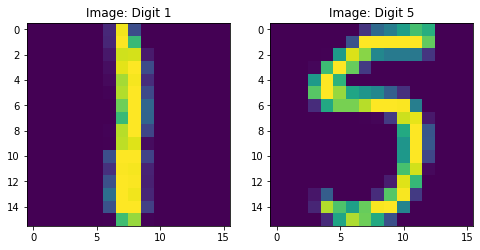

In [28]:
DIGIT_1 = TRAINING_DATA[6]
DIGIT_5 = TRAINING_DATA[-4]

show_images(DIGIT_1,DIGIT_5)

### 1.2 Implementing Representation 1

The project consists of exactly two feature extraction processes. In the first one,the features extracted are already determined by the instructor to implement. In the second process, the assignees are free to implement their own way of extraction to provide the training data that will later be used in logistic regression algorithm. These final forms are called Representation 1 and Representation 2, respectively. Representation 1 will be formed based on two attributes of images in the data set. These attributes are defined and computed as follows:
1. Intensity: It is the average pixel value of images, which are 16x16 matrices actually. Intensity is computed simply by taking the average value of pixels which construct the 16x16 image matrix.
2. Symmetry about y-Axis: It is the negative of the norm of the difference between the image and its y-axis symmetry. Using `NumPy` package, we can easily convert a 2D matrix into its symmetrical about y-axis form (See: `numpy.flip`). After taking difference of original and symmetrical form, we can calculate the norm of result by using `linalg` module inside `NumPy` package (See: `linalg.norm`).

The general-purpose array-processing package `NumPy`, and the availability of functional programming approach for creation of lists are utilized for this task. In the end, we obtained a training data matrix of size 1561x2 and test data matrix of size 424x2 after feature extraction for Representation 1, whereby the columns of matrices denote the intensity and the symmetry about y-axis values


In [29]:
INTENSITY_TRAINING = [np.average(element) for element in TRAINING_DATA]
INTENSITY_TEST = [np.average(element) for element in TEST_DATA]

SYMMETRY_Y_TRAINING = [-1*LA.norm(np.subtract(element,np.flip(element,1)),'fro') for element in TRAINING_DATA]
SYMMETRY_Y_TEST = [-1*LA.norm(np.subtract(element,np.flip(element,1)),'fro') for element in TEST_DATA]

FEATURES_REP_1_TRAINING = [INTENSITY_TRAINING,SYMMETRY_Y_TRAINING]
FEATURES_REP_1_TEST = [INTENSITY_TEST,SYMMETRY_Y_TEST]

### 1.3 Visualization of Representation 1

The final step of feature extraction is to visualize the clusters that you have obtained by the attributes used to form the training and test data. The visualization provides a structured perception about how accurately the attributes separate the data points according to the class labels. 

We should note that our scatter plot will be in a 2-dimensional region, since we have 2 attributes extracted for Representation 1. Below, you will be able to see the scatter plot for training and test data points for Representation 1, whereby the blue markers shaped 'o' denote the data points of label 1 (digit 1), and the red markers shaped 'x' denote the data points of label -1 (digit 5) respectively. You can check the legend provided as well.

Thanks to `matplotlib` package we can easily build scatter plots by simply giving the coordinate points belonging to the axes separately by vectors. We can also set colors, marker types, and labels that eases the analysis of clusters.

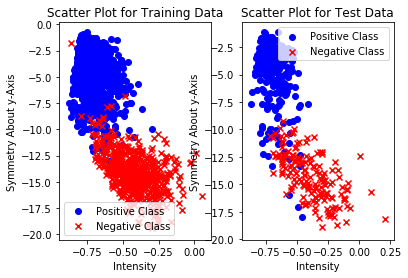

In [30]:
fig = plt.figure()
ax = fig.add_subplot(121)
positive_class_training,negative_class_training = scatter_plot_helper(Y_TRAINING,FEATURES_REP_1_TRAINING)
ax.scatter(positive_class_training[0], positive_class_training[1], c='b', marker='o',label='Positive Class')
ax.scatter(negative_class_training[0], negative_class_training[1], c='r', marker='x',label='Negative Class')
ax.set_xlabel('Intensity')
ax.set_ylabel('Symmetry About y-Axis')
plt.title("Scatter Plot for Training Data")
ax.legend()
ax = fig.add_subplot(122)
positive_class_test,negative_class_test = scatter_plot_helper(Y_TEST,FEATURES_REP_1_TEST)
ax.scatter(positive_class_test[0], positive_class_test[1], c='b', marker='o',label='Positive Class')
ax.scatter(negative_class_test[0], negative_class_test[1], c='r', marker='x',label='Negative Class')
ax.set_xlabel('Intensity')
ax.set_ylabel('Symmetry About y-Axis')
plt.title("Scatter Plot for Test Data")
ax.legend()
plt.show()

### 1.4 Implementing Representation 2 & Visualization

Implementation of Representation 2 is the stage where the creativity and endeavour of assignees play a key role at most. At this stage, we try to figure out new attributes that describes the images within the data as well as possible.

Below, you will see the definitions of new attributes that we have extracted for Representation 2.
    
1. Symmetry About x-Axis: It is the negative of the norm of the difference between the image and its x-axis symmetry. Using NumPy package, we can easily convert a 2D matrix into its symmetrical about x-axis form `(See: numpy.flip)` After taking difference of original and symmetrical form, we can calculate the norm of result by using "linalg" module inside NumPy package `(See: linalg.norm)`.
2. Brightness: The title is just the name we have used during project. Let me introduce the logic behind our attribute, and its power. After long observations for 16x16 data matrices for an image, we figured out that the indices that the bright pixels that lie within a row vary more for digit 5 rather than digit 1. This makes sense considering the nature of their shape. Our strategy was imagining as if we were drawing both the digits into a clean paper and to perceive the main differences in their characteristics. This very first attribute, our strategy has brought us, work as follows. We simply determine a threshold value of 0.8 for labeling a pixel as bright. Then in each row, we take the average value of bright indices. Finally, for the entire image, we compute the standard deviation of mean values for 16 rows. The reason why we have chosen this approach was to imitate a drawing pencil as possible as we could.
3. Darkness: Our approach for the last attribute is very similar to that of the second one which we called 'Brightness'. This final attribute is quiet much like the previous one, which could be considered as the other side of the coin. While the brightness attribute analyzes the points that the pencil moves towards, this feature aims at analyzing the empty spaces. Combined with the second feature, we aim at fitting our digits into a followed pattern. Computation of the final attribute is as follows. Just as we did for attribute 2, for each row we set a threshold value of -0.75 for labeling a pixel as dark. Then for each row, we analyze the consecutive dark pixels, simply take the first and last consecutive dark space, and compute the absolute value of their differences in lengths. Finally, for the entire image, we compute the standard deviation of values found for each row. The reason why we have chose this approach was to describe the curvature property of digit 5 as possible as we could. Plus, we can say that digit 1 does not vary a lot in terms of the differences between the dark spaces of left and right side of bright pixels.

The general-purpose array-processing package `NumPy`, and the availability of functional programming approach for creation of lists are utilized for this task as well. In the end, we obtained a training data matrix of size 1561x3 and test data matrix of size 424x3 after feature extraction for Representation 2, whereby the columns of matrices denote the symmetry about x-axis and the brightness, and the darkness values.
    
Regarding Representation 2, we must follow a 3D-visualization considering that this time we have 3 attributes to form training and test data. `Matplotlib` package provides an easy way of implementing a 3D scatter plot that you can observe below for Representation 2.

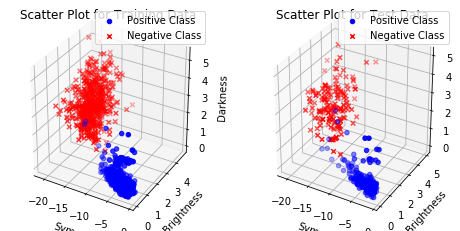

In [31]:
DARKNESS_TRAINING = [darkness_distribution_analysis(element) for element in TRAINING_DATA]
DARKNESS_TEST = [darkness_distribution_analysis(element) for element in TEST_DATA]

BRIGHTNESS_TRAINING = [brightness_distribution_analysis(element) for element in TRAINING_DATA]
BRIGHTNESS_TEST = [brightness_distribution_analysis(element) for element in TEST_DATA]

SYMMETRY_X_TRAINING = [-1*LA.norm(np.subtract(element,np.flip(element,0)),'fro') for element in TRAINING_DATA]
SYMMETRY_X_TEST = [-1*LA.norm(np.subtract(element,np.flip(element,0)),'fro') for element in TEST_DATA]

FEATURES_REP_2_TRAINING = [SYMMETRY_X_TRAINING,BRIGHTNESS_TRAINING,DARKNESS_TRAINING]
FEATURES_REP_2_TEST = [SYMMETRY_X_TEST,BRIGHTNESS_TEST,DARKNESS_TEST]

#
# 3D-Scatter Plot for Visualization of Representation 2
#

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(121,projection='3d')
positive_class_training,negative_class_training = scatter_plot_helper(Y_TRAINING,FEATURES_REP_2_TRAINING)
ax.scatter(positive_class_training[0], positive_class_training[1], positive_class_training[2], c='b', marker='o',label='Positive Class')
ax.scatter(negative_class_training[0], negative_class_training[1], negative_class_training[2], c='r', marker='x',label='Negative Class')
ax.set_xlabel('Sym-x')
ax.set_ylabel('Brightness')
ax.set_zlabel('Darkness')
plt.title("Scatter Plot for Training Data")
ax.legend()
ax = fig.add_subplot(122,projection='3d')
positive_class_test,negative_class_test = scatter_plot_helper(Y_TEST,FEATURES_REP_2_TEST)
ax.scatter(positive_class_test[0], positive_class_test[1], positive_class_test[2], c='b', marker='o',label='Positive Class')
ax.scatter(negative_class_test[0], negative_class_test[1], negative_class_test[2], c='r', marker='x',label='Negative Class')
ax.set_xlabel('Sym-x')
ax.set_ylabel('Brightness')
ax.set_zlabel('Darkness')
plt.title("Scatter Plot for Test Data")
ax.legend()
plt.show()

### 1.5 Correlation Analysis: Representation 1 & Representation 2

Now that we have constructed our representations, we move forward through the final stage of Task 1, where we finalize our  attributes. Given that Representation 1 is already determined, our actual aim is to decide on the attributes that we utilize for Representation 2. 

At this point, we conduct correlation analysis for both representations. Analyzing the relationship between the attributes provide an insight into the separation of clusters based on the features. Below, you can see the bar charts indicating the correlation coefficients between the attributes within the representations.

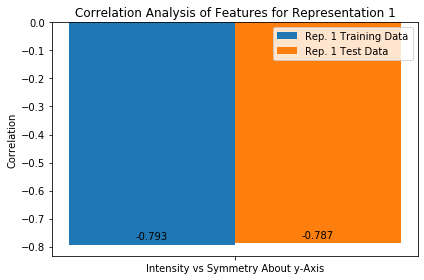

In [32]:
#
# CORRELATION ANALYSIS FOR REPRESENTATION 1
#
fig, ax = plt.subplots()
x = np.arange(1)
cor_rep_1_train = np.array([np.corrcoef(FEATURES_REP_1_TRAINING[0],FEATURES_REP_1_TRAINING[1])[0][1]])
cor_rep_1_test = np.array([np.corrcoef(FEATURES_REP_1_TEST[0],FEATURES_REP_1_TEST[1])[0][1]])
cor_rep_1_train_rounded = [round(elem, 3) for elem in cor_rep_1_train]
cor_rep_1_test_rounded = [round(elem, 3) for elem in cor_rep_1_test]
width = 0.2  # the width of the bars
rects1 = ax.bar(x - width / 2, cor_rep_1_train_rounded, width, label='Rep. 1 Training Data')
rects2 = ax.bar(x + width / 2, cor_rep_1_test_rounded, width, label='Rep. 1 Test Data')
ax.set_ylabel('Correlation')
ax.set_title('Correlation Analysis of Features for Representation 1')
ax.set_xticks(x)
ax.set_xticklabels(['Intensity vs Symmetry About y-Axis'])
ax.legend()
autolabel(rects1, ax)
autolabel(rects2, ax)
fig.tight_layout()
plt.show()

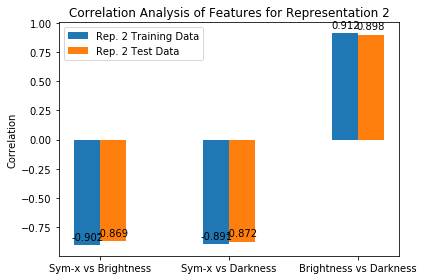

In [33]:
#
# CORRELATION ANALYSIS FOR REPRESENTATION 2
#
fig, ax = plt.subplots()
x = np.arange(3)
cor_rep_2_train = np.array([np.corrcoef(FEATURES_REP_2_TRAINING[0],FEATURES_REP_2_TRAINING[1])[0][1],np.corrcoef(FEATURES_REP_2_TRAINING[0],FEATURES_REP_2_TRAINING[2])[0][1],np.corrcoef(FEATURES_REP_2_TRAINING[1],FEATURES_REP_2_TRAINING[2])[0][1]])
cor_rep_2_test = np.array([np.corrcoef(FEATURES_REP_2_TEST[0],FEATURES_REP_2_TEST[1])[0][1],np.corrcoef(FEATURES_REP_2_TEST[0],FEATURES_REP_2_TEST[2])[0][1],np.corrcoef(FEATURES_REP_2_TEST[1],FEATURES_REP_2_TEST[2])[0][1]])
cor_rep_2_train_rounded = [round(elem, 3) for elem in cor_rep_2_train]
cor_rep_2_test_rounded = [round(elem, 3) for elem in cor_rep_2_test]
width = 0.2  # the width of the bars
rects1 = ax.bar(x - width / 2, cor_rep_2_train_rounded, width, label='Rep. 2 Training Data')
rects2 = ax.bar(x + width / 2, cor_rep_2_test_rounded, width, label='Rep. 2 Test Data')
ax.set_ylabel('Correlation')
ax.set_title('Correlation Analysis of Features for Representation 2')
ax.set_xticks(x)
ax.set_xticklabels(['Sym-x vs Brightness','Sym-x vs Darkness','Brightness vs Darkness'])
ax.legend()
autolabel(rects1, ax)
autolabel(rects2, ax)
fig.tight_layout()
plt.show()

Observing the bar charts, we conclude that the attributes in Representation 2 provides a better intercluster separation according to the features. We result in a beneficial acquisition that will lead a better accuracy as we will see in `Evaluation` section.

## Task 2: Logistic Regression

The final form of training and test set must be ready, before moving forward into logistic regression. We must insert 1 into the beginning of each row of samples, since we have an intercept term in the model weights. Our final data points will look like [1,$x_1$,$x_2$] for 2-D features and [1,$x_1$,$x_2$,$x_3$] for 3-D features, while the model vector will be [$w_0, w_1, w_2$] and [$w_0, w_1, w_2, w_3$] respectively, where $w_0$ is the intercept term.

In [34]:
X_TRAINING_REP_1 = form_input_data(FEATURES=FEATURES_REP_1_TRAINING)
X_TEST_REP_1 = form_input_data(FEATURES=FEATURES_REP_1_TEST)

X_TRAINING_REP_2 = form_input_data(FEATURES=FEATURES_REP_2_TRAINING)
X_TEST_REP_2 = form_input_data(FEATURES=FEATURES_REP_2_TEST)


### 2.1 Logistic Regression

Logistic regression is a widely used machine learning application that is used to model the probability of a certain class. Binary classifier can be extended to a multivariate version by subsequently occupying binary clusters. 
In the project, we are asked to build a model for a binary class of value +1 and -1 where labels denote digits 1 and 5 respectively. Given that our training data is finally available for logistic regression, we may continue with training our model. The logistic regression learning algorithm we have implemented can be documented as follows:

**Logistic Regression Algorithm**
Reference: Learning From Data, Yaser S. Abu-Mostafa, Malik Magdon-Ismail, Hsuan-Tien Lin
1. Initialize the weights at time step t=0 to w(0). (Random Initialization by Normal Distribution is applied.)

2. **for** t=0,1,2,... **do**

    2.1 Compute the gradient $g_t = \nabla E_{in}(w(t))$. (The gradient computation will be discussed later.)
    
    2.2 Set the direction to move $v_t = -g_t$
    
    2.3 Update the weights: w(t+1) = w(t) + $\eta v_t$
    
    2.4 Iterate to the next step until it is time to stop. (Until the absolute difference between current loss value and previous loss value is less than $\epsilon =  10^4$)

3. Return the final weights.

Now that we have introduced our learning algorithm, we may present the loss function and gradient computation. Please see the report for detailed derivation for formula stated below:

**Loss Function**

Loss value constitutes the core of logistic regression algorithm. Its characteristic that is defined by sigmoid ($\theta(s)$) function enables providing binary classification models. In logistic regression, in-sample error measure is defined as
            
\begin{align}
                E_{in}(w) = \dfrac{1}{N} \sum_{i=1}^{N} ln(1 + {e}^{-y_iw^Tx_i}))
\end{align}
            
This equation becomes a smart choice when you realize that this error measure is small when $y_iw^Tx_i$ is large and positive, which implies $sign(w^Tx_i) = y_i$

**Gradient**
Now that we have defined out in-sample error function, let us introduce the computation of gradient with respect to w. Gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. To find a local minimum of a function using gradient descent, we take steps (aka learning rate) proportional to the negative of the gradient (or approximate gradient) of the function at the current point. The gradient can be computed by the formula given below:
\begin{align}
                \nabla E(w) &= \dfrac{1}{N} \sum_{i=1}^{N}{-y_ix_i \cdot \theta (-y_iw^Tx_i)}
\end{align}

The logistic learning algorithm can be analyzed by visualizing its core parameters including loss value and model weights. Our aim is to analyze the behavior of learning algorithm, and to satisfy that it provides the desired convergence property. Convergence of our algorithm can be proven by the visualization of loss values over the gradient descent iterations. Plus, by observing the behavior for each learning rate, we are expected to be led into a subset of appropriate learning rates, which convince us to continue with. For this purpose we have trained our model by 5 different learning rates. Below you can analyze the error values over the gradient descent iterations per each learning rate. As obviously seen by the figures, the convergence is satisfied by the given learning rates.

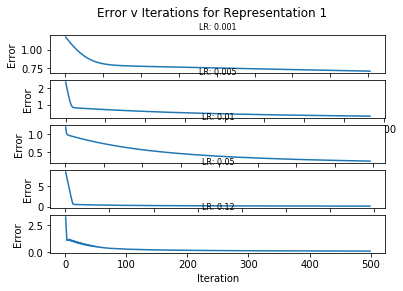

In [35]:
LEARNING_RATES_REP_1 = [0.001,0.005,0.01,0.05,0.12]
_,WEIGHTS_REP_1,ERRORS_REP_1,ITERATION_COUNTS_REP_1 = logistic_regression_manager(X=X_TRAINING_REP_1,Y=Y_TRAINING,LEARNING_RATES=LEARNING_RATES_REP_1,LAMBDA=None)
# PLOT: E(w) vs Time over Iterations
error_vs_time_visualization(LEARNING_RATES_REP_1,ERRORS_REP_1,ITERATION_COUNTS_REP_1,"Representation 1","LR")

Further analysis on the behavior of learning process would yield beneficial insight into the way learning algorithm works. Therefore, we have aimed at trying other applications that we might follow to improve our knowledge about the algorithm. For this purpose, we have analyzed the in-sample error value versus weight coefficients and accuracy evaluations. The first one aims at observing the behavior of loss value as the weight coefficients change. We aim at investigating whether it oscillates wildly and observing the final values of weights to gain a first impression about whether over-fitting might become an issue.

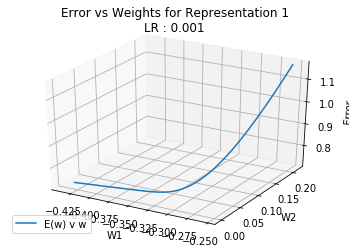

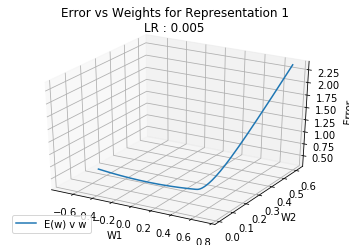

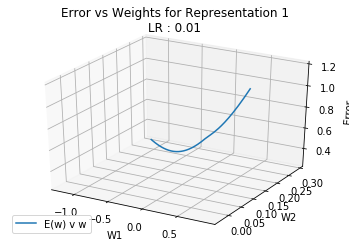

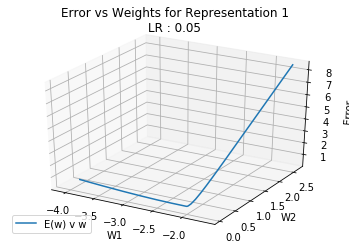

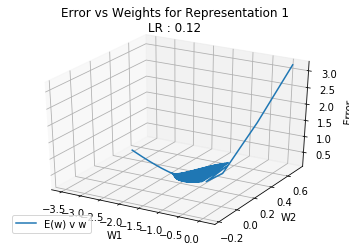

In [36]:
# PLOT: E(w) vs W During Iterations
error_vs_w_3d_visualization(ERRORS_REP_1,WEIGHTS_REP_1,LEARNING_RATES_REP_1,"Representation 1","LR")

The accuracy analysis is actually related to the evaluation section of project. Therefore after the required implementations for evaluation have been completed, we have thought that we may carry out an accuracy analysis for each learning rate to make sure that they provide satisfactory accuracy results. This way, we can conclude that we can continue using a reliable subset of learning rates that will give rise to satisfactory accuracy results.

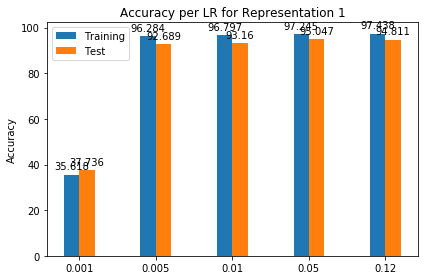

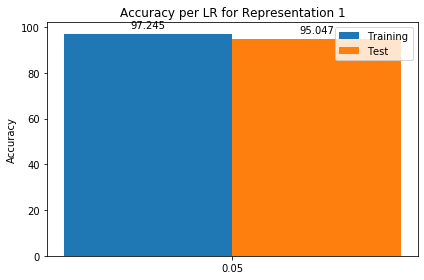

In [37]:
# Accuracy Plots for REPRESENTATION 1
W_OPTIMAL_REP_1,LEARNING_RATE_OPTIMAL_REP_1 = get_optimal_weights(X_TRAINING_REP_1,X_TEST_REP_1,Y_TRAINING,Y_TEST,WEIGHTS_REP_1,LEARNING_RATES_REP_1,'Representation 1','LR')
Y_Predicted_Training_REP_1 = predict(X_TRAINING_REP_1,W_OPTIMAL_REP_1)
Y_Predicted_Test_REP_1 = predict(X_TEST_REP_1,W_OPTIMAL_REP_1)
Accuracy_Training_REP_1 = accuracy_score(Y_TRAINING,Y_Predicted_Training_REP_1)
Accuracy_Test_REP_1 = accuracy_score(Y_TEST,Y_Predicted_Test_REP_1)
accuracy_plots([Accuracy_Training_REP_1],[Accuracy_Test_REP_1],[LEARNING_RATE_OPTIMAL_REP_1],'Representation 1',"LR")

The same logistic learning procedure applied for Representation 1 is repeated for Representation 2 below. The model is trained by 5 different learning rates, and the following observations are conducted step by step. Below you will see the loss value over iterations per learning rates.

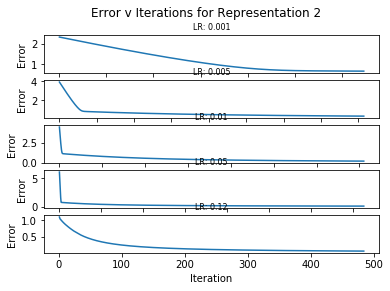

In [38]:
# REPRESENTATION 2
LEARNING_RATES_REP_2 = [0.001,0.005,0.01,0.05,0.12]
_,WEIGHTS_REP_2,ERRORS_REP_2,ITERATION_COUNTS_REP_2 = logistic_regression_manager(X=X_TRAINING_REP_2,Y=Y_TRAINING,LEARNING_RATES=LEARNING_RATES_REP_2,LAMBDA=None)
# PLOT: E(w) vs Time over Iterations
error_vs_time_visualization(LEARNING_RATES_REP_2,ERRORS_REP_2,ITERATION_COUNTS_REP_2,"Representation 2","LR")

Below you can see the 3D visualization of error value by changing weights over gradient descent iterations for Representation 2.

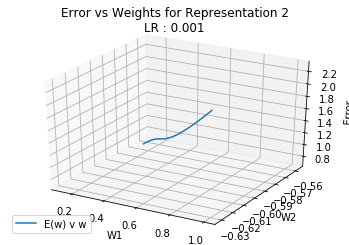

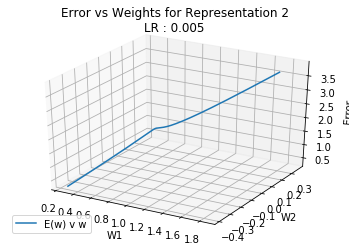

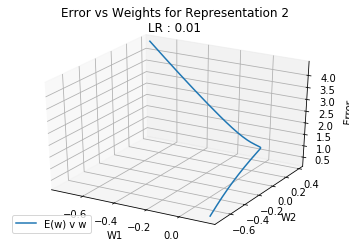

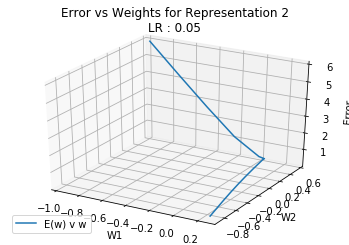

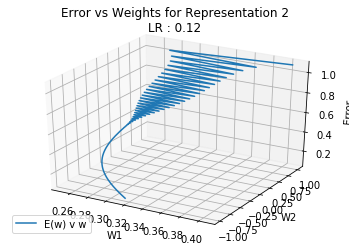

In [39]:
# PLOT: E(w) vs W over Iterations
error_vs_w_3d_visualization(ERRORS_REP_2,WEIGHTS_REP_2,LEARNING_RATES_REP_2,"Representation 2","LR")

Eventually you can see the first impressions about the accuracy results of Representation 2 by given learning rates.

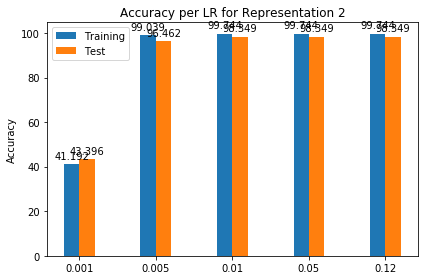

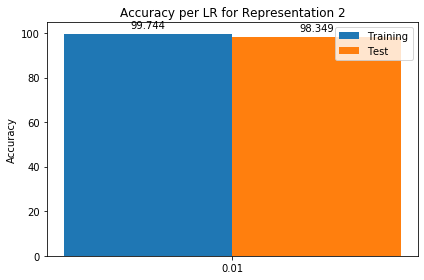

In [40]:
# Accuracy Plots for REPRESENTATION 2
W_OPTIMAL_REP_2,LEARNING_RATE_OPTIMAL_REP_2 = get_optimal_weights(X_TRAINING_REP_2,X_TEST_REP_2,Y_TRAINING,Y_TEST,WEIGHTS_REP_2,LEARNING_RATES_REP_2,'Representation 2','LR')
Y_Predicted_Training_REP_2 = predict(X_TRAINING_REP_2,W_OPTIMAL_REP_2)
Y_Predicted_Test_REP_2 = predict(X_TEST_REP_2,W_OPTIMAL_REP_2)
Accuracy_Training_REP_2 = accuracy_score(Y_TRAINING,Y_Predicted_Training_REP_2)
Accuracy_Test_REP_2 = accuracy_score(Y_TEST,Y_Predicted_Test_REP_2)
accuracy_plots([Accuracy_Training_REP_2],[Accuracy_Test_REP_2],[LEARNING_RATE_OPTIMAL_REP_2],'Representation 2',"LR")

### 2.2 Regularization

In machine learning, regularization is concept of adding a penalty-term into the in-sample error function in order to prevent large magnitude of model weights. Generally, over-fitting occurs whenever the magnitudes become larger, implying a well-formed weights for training data, but not a generalized solution for test data.
    
The regularized in-sample error function becomes as below, to discourage larger magnitude of coefficients in model weights:
    
\begin{align}
        E_{in}(w) = \dfrac{1}{N} \sum_{i=1}^{N} ln(1 + {e}^{-y_iw^Tx_i})) + \dfrac{\lambda}{2}\cdot||w||_2^2
\end{align}
    
The gradient of error function becomes:
\begin{align}
        \nabla E(w) &= \dfrac{1}{N} \sum_{i=1}^{N}{-y_ix_i \cdot \theta (-y_iw^Tx_i)} + \lambda \cdot w
\end{align}
    
The implementation of regularization can easily be done by adding additional terms into the error and gradient computations. 

As we did previously in standard logistic regression (without considering regularization), we train our model by 5 different tuned parameters. However, this time the parameters tuned are regularization coefficients instead of learning rates. This time by analyzing the behavior of algorithm, we try to find a subset of regularization coefficients that we can move forward. Note that since learning rate of 0.05 is observed as consistent, we picked this value as constant learning rate to be used in training by regularization.

Plus, we must ensure that our algorithm converges for certain lambda values as expected, since we are going to implement **Cross Validation** in next section to determine the optimal lambda coefficient. By observing their behavior about convergence, we anticipate to be led into consistent lambda parameters and the observation of properly implemented regularization. Below you can see the convergence curves for lambda values for Representation 1. Note that the lambda values used are 0 (no regularization implied), 0.5, 0.05, 0.005, and 0.0005 respectively.

Finally, as we did in **Section 2.1**, we analyze the error value by changing weights over iterations per different lambda coefficients and accuracy results for the same purposes we have already explained in **Section 2.1**. The only changing learning parameter is lambda coefficient this time. 

Below you can see the plots for loss values over iterations per lambda coefficients.

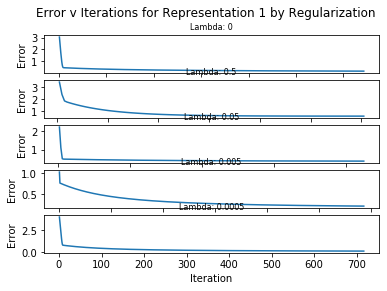

In [41]:
#REGULARIZATION for REPRESENTATION 1
LEARNING_RATE_REP_1_REG = 0.05
LAMBDA_LIST_1 = [0,0.5,0.05,0.005,0.0005]
W_OPTIMAL_REP_1_REG,WEIGHTS_REP_1_REG,ERRORS_REP_1_REG,ITERATION_COUNTS_REP_1_REG = regularization_manager(X=X_TRAINING_REP_1,Y=Y_TRAINING,LEARNING_RATE=LEARNING_RATE_REP_1_REG,LAMBDA_LIST=LAMBDA_LIST_1)
error_vs_time_visualization(LAMBDA_LIST_1,ERRORS_REP_1_REG,ITERATION_COUNTS_REP_1_REG,"Representation 1 by Regularization","Lambda")

Below you can see the 3D visualization of error value by changing weights over gradient descent iterations for Representation 1.

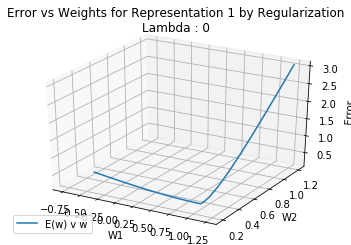

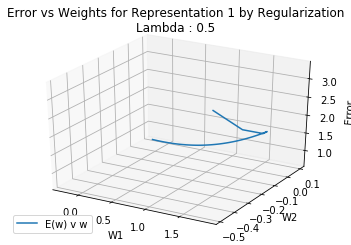

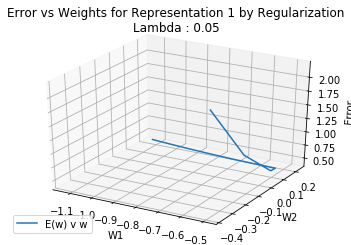

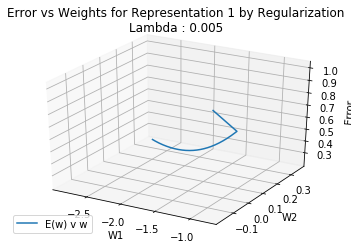

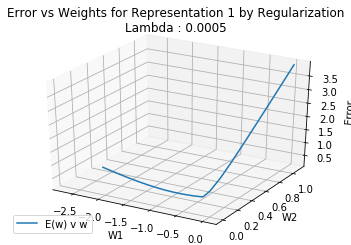

In [42]:
# PLOT: E(w) vs W over Iterations
error_vs_w_3d_visualization(ERRORS_REP_1_REG,WEIGHTS_REP_1_REG,LAMBDA_LIST_1,"Representation 1 by Regularization","Lambda")

Eventually you can see the first impressions about the accuracy results of Representation 1 by given lambda coefficients.

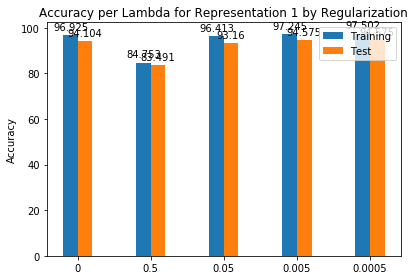

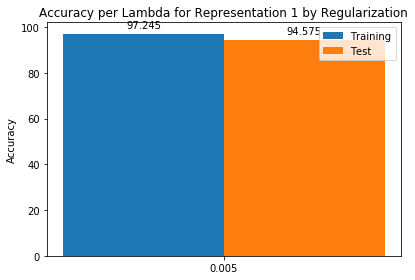

In [43]:
#Accuracy for REP 1 by Regularization
W_OPTIMAL_REP_1_REG,LAMBDA_OPTIMAL_REP_1_REG = get_optimal_weights(X_TRAINING_REP_1,X_TEST_REP_1,Y_TRAINING,Y_TEST,WEIGHTS_REP_1_REG,LAMBDA_LIST_1,'Representation 1 by Regularization','Lambda')
Y_Predicted_Training_REP_1_REG = predict(X_TRAINING_REP_1,W_OPTIMAL_REP_1_REG)
Y_Predicted_Test_REP_1_REG = predict(X_TEST_REP_1,W_OPTIMAL_REP_1_REG)
Accuracy_Training_REP_1_REG = accuracy_score(Y_TRAINING,Y_Predicted_Training_REP_1_REG)
Accuracy_Test_REP_1_REG = accuracy_score(Y_TEST,Y_Predicted_Test_REP_1_REG)
accuracy_plots([Accuracy_Training_REP_1_REG],[Accuracy_Test_REP_1_REG],[LAMBDA_OPTIMAL_REP_1_REG],'Representation 1 by Regularization',"Lambda")

The same logistic learning procedure applied for Representation 1 is repeated for Representation 2 below. The model is trained by 5 different regularization coefficients, and the following observations are conducted step by step. Below you can see the plots for loss values over iterations per lambda coefficients.

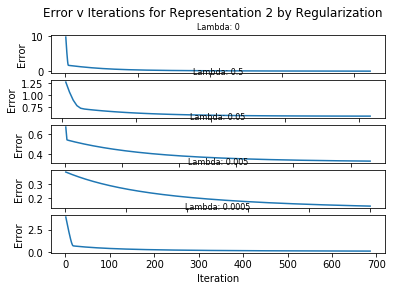

In [44]:
#REGULARIZATION for REPRESENTATION 2
LEARNING_RATE_REP_2_REG = 0.05
LAMBDA_LIST_2 = [0,0.5,0.05,0.005,0.0005]
W_OPTIMAL_REP_2_REG,WEIGHTS_REP_2_REG,ERRORS_REP_2_REG,ITERATION_COUNTS_REP_2_REG = regularization_manager(X=X_TRAINING_REP_2,Y=Y_TRAINING,LEARNING_RATE=LEARNING_RATE_REP_2_REG,LAMBDA_LIST=LAMBDA_LIST_2)
error_vs_time_visualization(LAMBDA_LIST_2,ERRORS_REP_2_REG,ITERATION_COUNTS_REP_2_REG,"Representation 2 by Regularization","Lambda")

Below you can see the 3D visualization of error value by changing weights over gradient descent iterations for Representation 1.

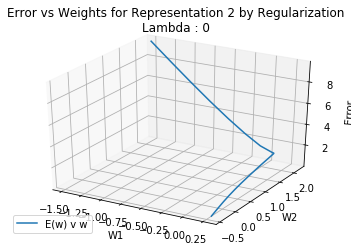

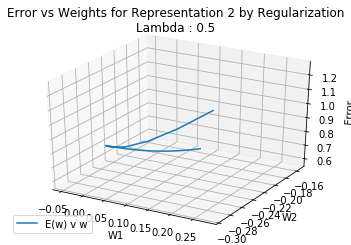

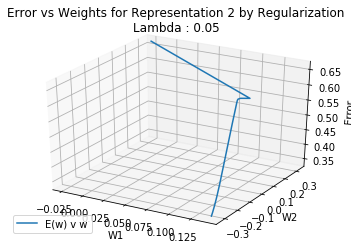

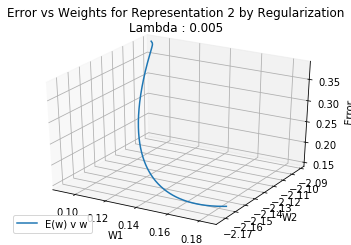

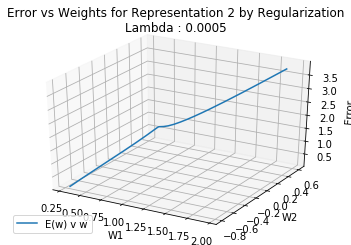

In [45]:
error_vs_w_3d_visualization(ERRORS_REP_2_REG,WEIGHTS_REP_2_REG,LAMBDA_LIST_2,"Representation 2 by Regularization","Lambda")

Eventually you can see the first impressions about the accuracy results of Representation 2 by given lambda coefficients.

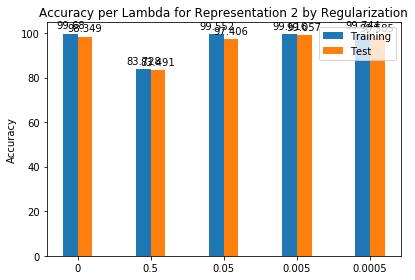

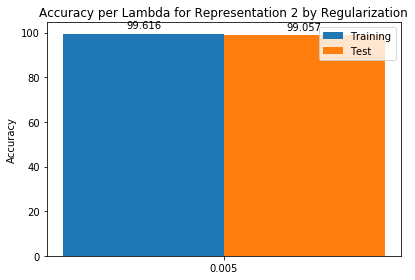

In [46]:
#Accuracy for REP 2 by Regularization
W_OPTIMAL_REP_2_REG,LAMBDA_OPTIMAL_REP_2_REG = get_optimal_weights(X_TRAINING_REP_2,X_TEST_REP_2,Y_TRAINING,Y_TEST,WEIGHTS_REP_2_REG,LAMBDA_LIST_2,'Representation 2 by Regularization','Lambda')
Y_Predicted_Training_REP_2_REG = predict(X_TRAINING_REP_2,W_OPTIMAL_REP_2_REG)
Y_Predicted_Test_REP_2_REG = predict(X_TEST_REP_2,W_OPTIMAL_REP_2_REG)
Accuracy_Training_REP_2_REG = accuracy_score(Y_TRAINING,Y_Predicted_Training_REP_2_REG)
Accuracy_Test_REP_2_REG = accuracy_score(Y_TEST,Y_Predicted_Test_REP_2_REG)
accuracy_plots([Accuracy_Training_REP_2_REG],[Accuracy_Test_REP_2_REG],[LAMBDA_OPTIMAL_REP_2_REG],'Representation 2 by Regularization','Lambda')

Since we have implemented our learning algorithm by regularization, we may move forward into the **Cross Validation** in order to find the optimal lambda coefficients for both representations.

### 2.3 Cross Validation

Our aim in this section is to seek out the optimal lambda for our model to result in the highest accuracy. The code is written in a way that it finds the optimal lambda in the list given as a parameter. 

Optimal lambda values are found for both Representation 1 and Representation 2.


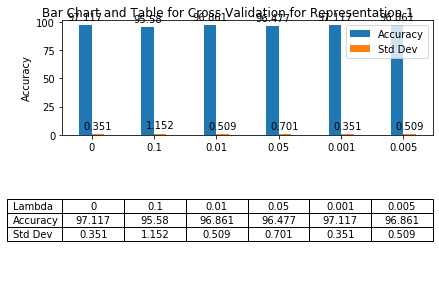

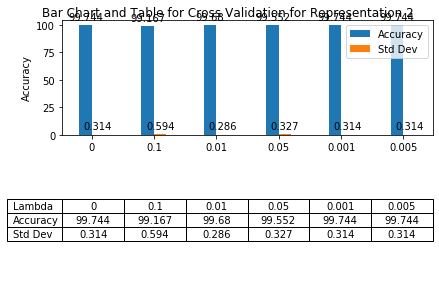

In [47]:
LAMBDA_OPTIMAL_REP_1 = cross_validation_manager(X_TRAINING_REP_1,Y_TRAINING,s=5, lambda_list=[0, 0.1, 0.01, 0.05, 0.001, 0.005], mode=False, representation ="Representation 1")
LAMBDA_OPTIMAL_REP_2 = cross_validation_manager(X_TRAINING_REP_2,Y_TRAINING,s=5, lambda_list=[0, 0.1, 0.01, 0.05, 0.001, 0.005], mode=False, representation ="Representation 2")

## 3. Evaluation (25 Pts)

### 3.1 Accuracy Analysis:
Accuracy analysis is an important notion in Machine Learning since the important thing about our model is accuracy or succes rate of it. This also determines reliability of our model. 

We start utilizing a logistic regression with regularization to find an array of optimal weights for different learning rates.

In [48]:
#3.1 Accuracy Analysis
#
# REPRESENTATION 1
#
_,WEIGHTS_REP_1,ERRORS_REP_1,ITERATION_COUNTS_REP_1 = logistic_regression_manager(X=X_TRAINING_REP_1,Y=Y_TRAINING,LEARNING_RATES=LEARNING_RATES_REP_1,LAMBDA=LAMBDA_OPTIMAL_REP_1)
#

We continue finding the best weights that give us the highest accuracy by utilizing the function 'get_optimal_weights'. During the execution, a plot displaying different accuracy results for different learning rates is shown.

After that, using 'predict' and 'accuracy_score' functions, we obtain the accuracy of our model. Finally using the function 'accuracy_plots', the optimal learning rate corresponding to the highest accuracy is displayed on a plot.

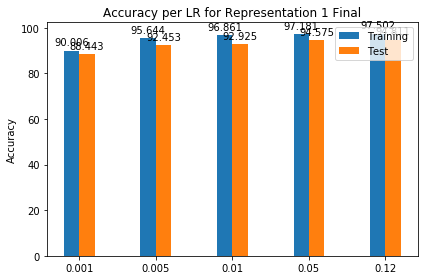

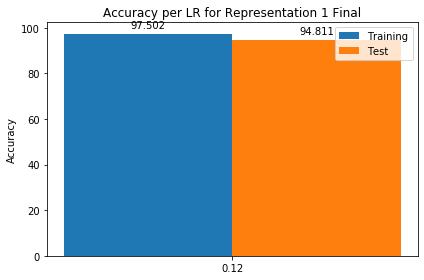

In [49]:
# Accuracy Plots for REPRESENTATION 1
#
W_OPTIMAL_REP_1,LEARNING_RATE_OPTIMAL_REP_1 = get_optimal_weights(X_TRAINING_REP_1,X_TEST_REP_1,Y_TRAINING,Y_TEST,WEIGHTS_REP_1,LEARNING_RATES_REP_1,'Representation 1 Final','LR')
Y_Predicted_Training_REP_1 = predict(X_TRAINING_REP_1,W_OPTIMAL_REP_1)
Y_Predicted_Test_REP_1 = predict(X_TEST_REP_1,W_OPTIMAL_REP_1)

Accuracy_Training_REP_1 = accuracy_score(Y_TRAINING,Y_Predicted_Training_REP_1)
Accuracy_Test_REP_1 = accuracy_score(Y_TEST,Y_Predicted_Test_REP_1)

accuracy_plots([Accuracy_Training_REP_1],[Accuracy_Test_REP_1],[LEARNING_RATE_OPTIMAL_REP_1],'Representation 1 Final','LR')


The same procedure is applied for Representation 2.

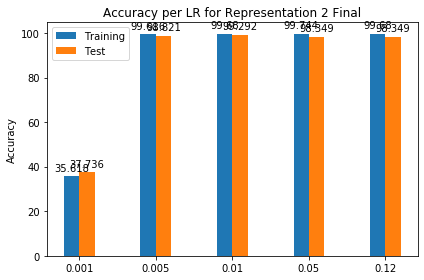

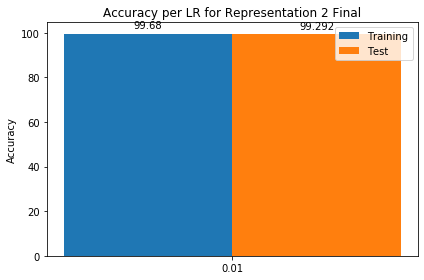

In [50]:
#
# REPRESENTATION 2
#
_,WEIGHTS_REP_2,ERRORS_REP_2,ITERATION_COUNTS_REP_2 = logistic_regression_manager(X=X_TRAINING_REP_2,Y=Y_TRAINING,LEARNING_RATES=LEARNING_RATES_REP_2,LAMBDA=LAMBDA_OPTIMAL_REP_2)
#
# Accuracy Plots for REPRESENTATION 2
#
W_OPTIMAL_REP_2,LEARNING_RATE_OPTIMAL_REP_2 = get_optimal_weights(X_TRAINING_REP_2,X_TEST_REP_2,Y_TRAINING,Y_TEST,WEIGHTS_REP_2,LEARNING_RATES_REP_2,'Representation 2 Final','LR')
Y_Predicted_Training_REP_2 = predict(X_TRAINING_REP_2,W_OPTIMAL_REP_2)
Y_Predicted_Test_REP_2 = predict(X_TEST_REP_2,W_OPTIMAL_REP_2)

Accuracy_Training_REP_2 = accuracy_score(Y_TRAINING,Y_Predicted_Training_REP_2)
Accuracy_Test_REP_2 = accuracy_score(Y_TEST,Y_Predicted_Test_REP_2)

accuracy_plots([Accuracy_Training_REP_2],[Accuracy_Test_REP_2],[LEARNING_RATE_OPTIMAL_REP_2],'Representation 2 Final','LR')

### 3.2 Decision Boundary:
The final step is to display a scattered plot with a decision boundary on it for Test and Training Data for Representation 1

The first step is to apply the formula for the decision boundary, which is as follows:

\begin{align}
    w_Tx = 0
\end{align}

And the explicit version of it is as follows:

\begin{align}
    x_2 = -\frac{w_1}{w_2}*x_1 - \frac{w_0}{w_2}
\end{align}

And in terms of the variables below:

\begin{align}
    x_2 = slope\_line*x_1 + intercept
\end{align}

In [51]:
#
# 3.2 Visualization of Decision Boundary
#
# REPRESENTATION 1
#

slope_line = -1 * W_OPTIMAL_REP_1[0][1] / W_OPTIMAL_REP_1[0][2]
intercept = -1 * W_OPTIMAL_REP_1[0][0] / W_OPTIMAL_REP_1[0][2]

After the mathematical procedure, we proceed with plotting. Our line's equation is stored in the variable line_training and it is used to draw the line. 

And, the function 'scatter_plot_helper' is utilized to find the positive and negative classes.

Finally, positive classes are marked 'o' and negative classes are marked 'x' on the plot.

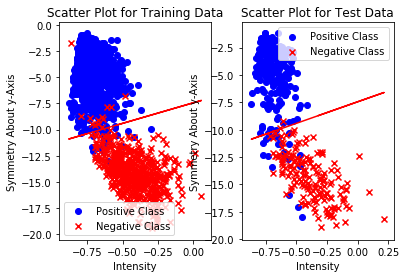

In [52]:
fig = plt.figure()
ax = fig.add_subplot(121)
line_training = np.add(np.multiply(INTENSITY_TRAINING,slope_line), intercept)
plt.plot(INTENSITY_TRAINING,line_training,'r')
positive_class_training,negative_class_training = scatter_plot_helper(Y_TRAINING,FEATURES_REP_1_TRAINING)
ax.scatter(positive_class_training[0], positive_class_training[1], c='b', marker='o',label='Positive Class')
ax.scatter(negative_class_training[0], negative_class_training[1], c='r', marker='x',label='Negative Class')
ax.set_xlabel('Intensity')
ax.set_ylabel('Symmetry About y-Axis')
plt.title("Scatter Plot for Training Data")
ax.legend()
ax = fig.add_subplot(122)
line_test = np.add(np.multiply(INTENSITY_TEST,slope_line), intercept)
plt.plot(INTENSITY_TEST,line_test,'r')
positive_class_test,negative_class_test = scatter_plot_helper(Y_TEST,FEATURES_REP_1_TEST)
ax.scatter(positive_class_test[0], positive_class_test[1], c='b', marker='o',label='Positive Class')
ax.scatter(negative_class_test[0], negative_class_test[1], c='r', marker='x',label='Negative Class')
ax.set_xlabel('Intensity')
ax.set_ylabel('Symmetry About y-Axis')
plt.title("Scatter Plot for Test Data")
ax.legend()
plt.show()

## References
* Learning from Data: A Short Course, Hsuan-Tien Lin, Malik Magdon-Ismail, and Yaser Abu-Mostafa
* https://en.wikipedia.org/wiki/Gradient_descent
* https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
